### Description of data
C1 : Ball defect (0.007 inch)

C2 : Ball defect (0.014 inch)

C3 : Ball defect (0.021 inch)

C4 : Inner race fault (0.007 inch)

C5 : Inner race fault (0.014 inch)

C6 : Inner race fault (0.021 inch)

C7 : Normal

C8 : Outer race fault (0.007 inch, data collected from 6 O'clock position)

C9 : Outer race fault (0.014 inch, 6 O'clock)

C10 : Outer race fault (0.021 inch, 6 O'clock)

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data_wav_energy = pd.read_csv('feature_time_final.csv')

In [11]:
data_wav_energy

,Unnamed: 0,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor,fault
0,0,0.359862,-0.326066,0.019037,0.121674,0.123095,-0.035087,-0.173578,2.923439,6.466187,B007
1,1,0.333993,-0.418900,0.016644,0.123858,0.124911,-0.196543,0.066407,2.673851,7.504862,B007
2,2,0.410764,-0.361113,0.023228,0.127706,0.129740,0.087575,-0.410059,3.166049,5.585454,B007
3,3,0.467716,-0.336705,0.021281,0.137159,0.138734,0.247045,0.139518,3.371323,6.519001,B007
4,4,0.468550,-0.438092,0.019683,0.158518,0.159658,0.006540,-0.407030,2.934707,8.111655,B007
...,...,...,...,...,...,...,...,...,...,...,...
4546,4546,0.207990,-0.186919,0.014878,0.068253,0.069823,-0.154576,-0.039878,2.978801,4.692954,Normal
4547,4547,0.195055,-0.181495,0.012885,0.065278,0.066506,-0.312184,-0.015466,2.932901,5.161398,Normal
4548,4548,0.214248,-0.224053,0.012330,0.068346,0.069416,-0.337865,0.038123,3.086434,5.629799,Normal
4549,4549,0.196098,-0.247209,0.012699,0.064896,0.066096,-0.411371,0.502724,2.966888,5.204855,Normal


In [12]:
data_wav_energy.drop(data_wav_energy.columns[[0]], axis = 1, inplace = True)

In [13]:
data_wav_energy

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor,fault
0,0.359862,-0.326066,0.019037,0.121674,0.123095,-0.035087,-0.173578,2.923439,6.466187,B007
1,0.333993,-0.418900,0.016644,0.123858,0.124911,-0.196543,0.066407,2.673851,7.504862,B007
2,0.410764,-0.361113,0.023228,0.127706,0.129740,0.087575,-0.410059,3.166049,5.585454,B007
3,0.467716,-0.336705,0.021281,0.137159,0.138734,0.247045,0.139518,3.371323,6.519001,B007
4,0.468550,-0.438092,0.019683,0.158518,0.159658,0.006540,-0.407030,2.934707,8.111655,B007
...,...,...,...,...,...,...,...,...,...,...
4546,0.207990,-0.186919,0.014878,0.068253,0.069823,-0.154576,-0.039878,2.978801,4.692954,Normal
4547,0.195055,-0.181495,0.012885,0.065278,0.066506,-0.312184,-0.015466,2.932901,5.161398,Normal
4548,0.214248,-0.224053,0.012330,0.068346,0.069416,-0.337865,0.038123,3.086434,5.629799,Normal
4549,0.196098,-0.247209,0.012699,0.064896,0.066096,-0.411371,0.502724,2.966888,5.204855,Normal


In [14]:
X=data_wav_energy.iloc[:,0:-1]

In [15]:
X

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor
0,0.359862,-0.326066,0.019037,0.121674,0.123095,-0.035087,-0.173578,2.923439,6.466187
1,0.333993,-0.418900,0.016644,0.123858,0.124911,-0.196543,0.066407,2.673851,7.504862
2,0.410764,-0.361113,0.023228,0.127706,0.129740,0.087575,-0.410059,3.166049,5.585454
3,0.467716,-0.336705,0.021281,0.137159,0.138734,0.247045,0.139518,3.371323,6.519001
4,0.468550,-0.438092,0.019683,0.158518,0.159658,0.006540,-0.407030,2.934707,8.111655
...,...,...,...,...,...,...,...,...,...
4546,0.207990,-0.186919,0.014878,0.068253,0.069823,-0.154576,-0.039878,2.978801,4.692954
4547,0.195055,-0.181495,0.012885,0.065278,0.066506,-0.312184,-0.015466,2.932901,5.161398
4548,0.214248,-0.224053,0.012330,0.068346,0.069416,-0.337865,0.038123,3.086434,5.629799
4549,0.196098,-0.247209,0.012699,0.064896,0.066096,-0.411371,0.502724,2.966888,5.204855


In [16]:
Y=data_wav_energy.iloc[:,-1]

In [17]:
Y

0         B007
1         B007
2         B007
3         B007
4         B007
         ...  
4546    Normal
4547    Normal
4548    Normal
4549    Normal
4550    Normal
Name: fault, Length: 4551, dtype: object

### Train_test_split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 750, random_state = 0,stratify = data_wav_energy['fault'])

In [19]:
X_train

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor
51,0.401793,-0.411390,0.019694,0.131634,0.133035,-0.046259,0.016446,3.020197,6.754990
2764,4.650763,-4.884469,0.015095,1.249425,1.248906,0.062732,2.122157,3.723869,82.736875
2562,1.989148,-1.772814,0.012530,0.548641,0.548516,0.066397,0.713315,3.626418,43.775624
3830,2.826181,-2.620853,0.017529,0.483440,0.483522,-0.206455,10.817465,5.844996,27.584382
3058,4.582320,-4.699173,0.009375,1.034755,1.034292,0.016527,4.229595,4.430392,110.320654
...,...,...,...,...,...,...,...,...,...
1939,0.482319,-0.411807,0.030126,0.149742,0.152671,-0.038005,0.001229,3.159202,5.067755
2267,2.444972,-1.963071,0.007826,0.619264,0.619011,0.116798,0.626531,3.949804,79.099516
3727,4.135773,-5.002992,0.011875,0.878792,0.878443,-0.738260,7.918749,4.708074,73.972543
3385,0.415770,-0.408260,0.009501,0.153483,0.153702,0.037286,-0.468946,2.705041,16.177529


In [20]:
y_train

51       B007
2764    OR007
2562    IR021
3830    OR021
3058    OR007
        ...  
1939    IR014
2267    IR021
3727    OR021
3385    OR014
3673    OR021
Name: fault, Length: 3801, dtype: object

### Model_building

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [22]:
model.score(X_test, y_test)

0.912

In [23]:
y_predicted = model.predict(X_test)



In [24]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm


array([[71,  0,  1,  0,  0,  0,  0,  0,  3,  0],
       [ 1, 63,  2,  0,  0,  0,  0,  0,  6,  3],
       [ 3,  3, 56,  0,  0,  0,  0,  0, 10,  1],
       [ 0,  0,  0, 73,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0, 75,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 74,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 75,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 72,  0,  2],
       [ 3,  6,  4,  0,  0,  0,  0,  0, 62,  0],
       [ 0,  3,  1,  3,  0,  1,  0,  4,  1, 63]], dtype=int64)

Text(69.0, 0.5, 'Truth')

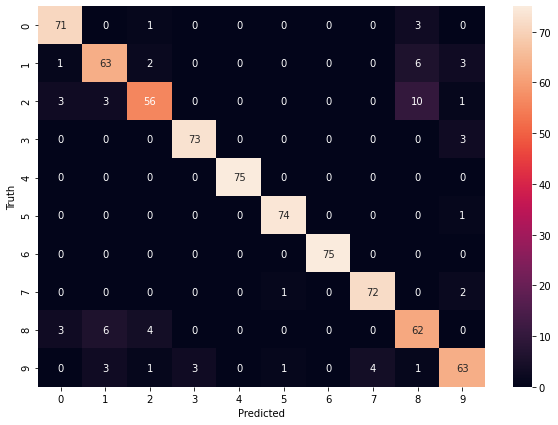

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10,100,1000], 'max_features': [5,7,9]},
    
    {'bootstrap': [False], 'n_estimators': [10,100,1000], 'max_features': [5,7,9]},
  ]

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5,
                           scoring=None,
                           return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [5, 7, 9],
                          'n_estimators': [10, 100, 1000]},
                         {'bootstrap': [False], 'max_features': [5, 7, 9],
                          'n_estimators': [10, 100, 1000]}],
             return_train_score=True)

In [27]:
grid_search.best_params_

{'max_features': 5, 'n_estimators': 1000}

In [28]:
grid_search.best_estimator_

RandomForestClassifier(max_features=5, n_estimators=1000, random_state=42)

In [29]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(max_features=5, n_estimators=1000, random_state=42)

In [30]:
final_model = grid_search.best_estimator_




final_predictions = final_model.predict(X_test)



In [31]:
from sklearn import metrics



# Print the confusion matrix
print(metrics.confusion_matrix(y_test, final_predictions))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, final_predictions, digits=3))

[[71  0  1  0  0  0  0  0  3  0]
 [ 1 63  1  0  0  0  0  0  6  4]
 [ 3  3 56  0  0  0  0  0 10  1]
 [ 0  0  0 74  0  0  0  0  0  2]
 [ 0  0  0  0 75  0  0  0  0  0]
 [ 0  0  0  0  0 74  0  0  0  1]
 [ 0  0  0  0  0  0 75  0  0  0]
 [ 0  0  0  0  0  1  0 72  0  2]
 [ 4  5  4  0  0  0  0  0 62  0]
 [ 0  3  2  3  0  2  0  4  0 62]]
              precision    recall  f1-score   support

        B007      0.899     0.947     0.922        75
        B014      0.851     0.840     0.846        75
        B021      0.875     0.767     0.818        73
       IR007      0.961     0.974     0.967        76
       IR014      1.000     1.000     1.000        75
       IR021      0.961     0.987     0.974        75
      Normal      1.000     1.000     1.000        75
       OR007      0.947     0.960     0.954        75
       OR014      0.765     0.827     0.795        75
       OR021      0.861     0.816     0.838        76

    accuracy                          0.912       750
   macro avg      0